In [106]:
#manipulation des données
import numpy as np
import pandas as pd 

# sklearn preprocessing pour le traitement les variables catégorielles
from sklearn.preprocessing import LabelEncoder

# Gestion du système de fichiers
import os

# Suppression des alertes 
import warnings
warnings.filterwarnings('ignore')

# matplotlib et seaborn pour les représentations graphiques
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

pd.set_option('display.max_columns', None) #permet d'afficher toutes les colonnes

In [108]:
df = pd.read_csv('../Data/4.KMeans_dataset.csv')
df = df.drop_duplicates(subset=['order_id'])
df = df.drop_duplicates(subset=['customer_unique_id'])
df

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat_x,geolocation_lng_x,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat_y,geolocation_lng_y,product_category_name_english,total_amount,total_shipping,Recency_x,Frequency_x,Recency_y,Frequency_y,Monetary,Cluster
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,no title,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,9350.0,maua,SP,-23.680114,-46.452454,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,-23.574809,-46.587471,housewares,38.71,82.82,27.289810,2,27.289810,2,1.303348,3
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50,1.0,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76,29.0,178.0,1.0,400.0,19.0,13.0,19.0,31570.0,belo horizonte,SP,-19.810119,-43.984727,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,-12.169860,-44.988369,perfumery,141.46,141.46,14.162002,1,14.162002,1,1.601216,0
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,no title,no message,2018-08-18 00:00:00,2018-08-22 19:07:58,1.0,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22,46.0,232.0,1.0,420.0,24.0,19.0,21.0,14840.0,guariba,SP,-21.362358,-48.232976,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,-16.746337,-48.514624,auto,179.12,179.12,13.051752,1,13.051752,1,1.647432,0
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,1.0,credit_card,1.0,72.20,359d03e676b3c069f62cadba8dd3f6e8,5.0,no title,O produto foi exatamente o que eu esperava e e...,2017-12-03 00:00:00,2017-12-05 19:21:58,1.0,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.00,27.20,59.0,468.0,3.0,450.0,30.0,10.0,20.0,31842.0,belo horizonte,MG,-19.840168,-43.923299,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,-5.767733,-35.275467,pet_shop,72.20,72.20,25.737451,1,25.737451,1,1.457031,1
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,1.0,credit_card,1.0,28.62,e50934924e227544ba8246aeb3770dd4,5.0,no title,no message,2018-02-17 00:00:00,2018-02-18 13:02:51,1.0,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.90,8.72,38.0,316.0,4.0,250.0,51.0,15.0,15.0,8752.0,mogi das cruzes,SP,-23.551707,-46.260979,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,-23.675037,-46.524784,stationer

In [109]:
df['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [110]:
#delivered = livré = 7
#invoiced = facturé = 4
#shipped = expédié = 6
#processing = traitement = 5
#unavailable = indisponible = 0
#canceled = annulé = 1
#created = créé = 2
#approved = approuvé = 3

In [111]:
df['order_status'] = df['order_status'].replace('delivered', 7)
df['order_status'] = df['order_status'].replace('shipped', 6)
df['order_status'] = df['order_status'].replace('processing', 5)
df['order_status'] = df['order_status'].replace('invoiced', 4)
df['order_status'] = df['order_status'].replace('approved', 3)
df['order_status'] = df['order_status'].replace('created', 2)
df['order_status'] = df['order_status'].replace('canceled', 1)
df['order_status'] = df['order_status'].replace('unavailable', 0)

In [112]:
df['order_status'].unique()

array([7, 4, 6, 5, 0, 1, 2, 3])

In [113]:
data_type = df.dtypes
object_type = data_type == 'object'
colonnes_object = df.loc[:, object_type]
colonnes_object.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'payment_type', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_id', 'seller_id',
       'shipping_limit_date', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_city', 'customer_state',
       'product_category_name_english'],
      dtype='object')

In [114]:
#payment_type
#review_score
#product_category_name_english

In [115]:
df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined',
       '0'], dtype=object)

In [116]:
df['payment_type'] = df['payment_type'].replace('credit_card', 5)
df['payment_type'] = df['payment_type'].replace('boleto', 4)
df['payment_type'] = df['payment_type'].replace('voucher', 3)
df['payment_type'] = df['payment_type'].replace('debit_card', 2)
df['payment_type'] = df['payment_type'].replace('not_defined', 1)
df['payment_type'] = df['payment_type'].replace('0', 0)

In [117]:
df['review_score'].unique()

array(['4.0', '5.0', '2.0', '1.0', 'no score', '3.0'], dtype=object)

In [118]:
index_noScore = df[df['review_score'] == 'no score'].index
df.drop(index_noScore, inplace=True)

In [119]:
df['review_score'] = df['review_score'].astype('float')

In [120]:
df['product_category_name_english'].nunique()

72

In [121]:
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()
df['product_category_name_english'] = labelencoder.fit_transform(df['product_category_name_english'])

In [122]:
df['product_category_name_english'].dtypes

dtype('int64')

In [123]:
data_type = df.dtypes
object_type = data_type == 'object'
colonnes_object = df.loc[:, object_type]
colonnes_object.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'product_id',
       'seller_id', 'shipping_limit_date', 'seller_city', 'seller_state',
       'customer_unique_id', 'customer_city', 'customer_state'],
      dtype='object')

In [124]:
df.drop(columns=colonnes_object.columns, inplace=True)

In [125]:
df.dtypes

order_status                       int64
payment_sequential               float64
payment_type                       int64
payment_installments             float64
payment_value                    float64
review_score                     float64
order_item_id                    float64
price                            float64
freight_value                    float64
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
product_weight_g                 float64
product_length_cm                float64
product_height_cm                float64
product_width_cm                 float64
seller_zip_code_prefix           float64
geolocation_lat_x                float64
geolocation_lng_x                float64
customer_zip_code_prefix           int64
geolocation_lat_y                float64
geolocation_lng_y                float64
product_category_name_english      int64
total_amount                     float64
total_shipping  

In [126]:
df = df.drop(columns=['geolocation_lng_y', 'geolocation_lat_y',\
                       'geolocation_lng_x', 'geolocation_lat_x',\
                          'order_item_id', 'seller_zip_code_prefix',\
                             'customer_zip_code_prefix', 'total_amount',\
                                'price', 'Frequency_y', 'Recency_y',\
                                   'total_shipping', 'payment_value',\
                                      'freight_value', 'product_description_lenght',\
                                         'product_weight_g', 'product_height_cm', 'product_width_cm',\
                                            'product_length_cm', 'product_name_lenght', 'Cluster'])

In [127]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [128]:
import pandas as pd
from scipy.stats import shapiro

shapiro_results = []

for column in df.columns:
       if df[column].dtype in ['float64', 'int64']:
           stat, p_value = shapiro(df[column])
           shapiro_results.append([column, stat, p_value])

shapiro_df = pd.DataFrame(shapiro_results, columns=['Variable', 'Statistique', 'P-value'])
shapiro_df

,Variable,Statistique,P-value
0,order_status,0.121031,0.0
1,payment_sequential,0.063785,0.0
2,payment_type,0.547663,0.0
3,payment_installments,0.734591,0.0
4,review_score,0.688695,0.0
5,product_photos_qty,0.771544,0.0
6,product_category_name_english,0.903357,0.0
7,Recency_x,0.979012,0.0
8,Frequency_x,0.146645,0.0
9,Monetary,0.776592,0.0


In [129]:
df

,order_status,payment_sequential,payment_type,payment_installments,review_score,product_photos_qty,product_category_name_english,Recency_x,Frequency_x,Monetary
0,7,1.0,5,1.0,4.0,4.0,49,27.289810,2,1.303348
1,7,1.0,4,1.0,4.0,1.0,60,14.162002,1,1.601216
2,7,1.0,5,3.0,5.0,1.0,5,13.051752,1,1.647432
3,7,1.0,5,1.0,5.0,3.0,61,25.737451,1,1.457031
4,7,1.0,5,1.0,5.0,4.0,67,22.505471,1,1.220373
...,...,...,...,...,...,...,...,...,...,...
96091,7,1.0,5,3.0,5.0,1.0,43,33.093157,1,1.494089
96092,7,1.0,5,3.0,4.0,4.0,6,22.786720,1,1.663569
96093,7,1.0,5,5.0,5.0,2.0,45,28.407875,1,1.723809
96094,7,1.0,5,4.0,2.0,1.0,15,23.908753,1,1.686544


In [130]:
df = np.log1p(df)

In [131]:
df.isnull().sum()

order_status                     0
payment_sequential               0
payment_type                     0
payment_installments             0
review_score                     0
product_photos_qty               0
product_category_name_english    0
Recency_x                        0
Frequency_x                      0
Monetary                         0
dtype: int64

In [132]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

In [135]:
n_components = 10
pca = PCA(n_components=n_components)

In [136]:
pca.fit(X_scaled)

PCA(n_components=10)

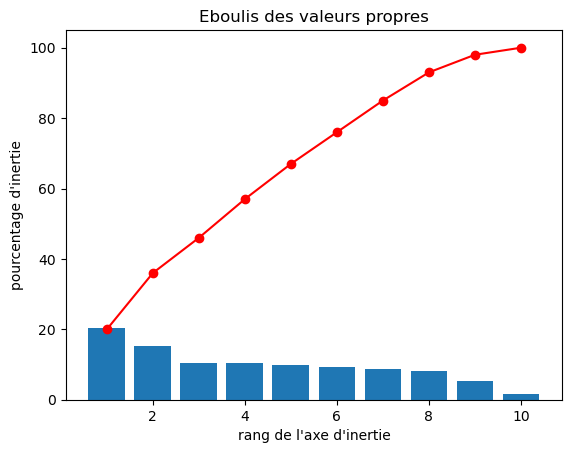

In [137]:
scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, n_components+1)
list(x_list)

plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [138]:
pcs = pca.components_
pcs = pd.DataFrame(pcs)
features = df.columns
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)
pcs.T

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10
order_status,-0.621134,0.164878,0.039310,0.056605,-0.002640,-0.030101,-0.049535,-0.291671,0.160438,0.684163
payment_sequential,0.055222,0.445023,-0.057190,0.404764,0.294995,0.208828,0.526559,0.295580,0.369510,0.000495
payment_type,-0.126034,-0.654243,-0.000003,-0.066082,-0.028285,-0.032273,0.062072,0.134473,0.724046,-0.060786
payment_installments,-0.175266,-0.554062,0.002784,0.241331,0.204952,0.172829,0.389525,0.199582,-0.546740,0.204173
review_score,-0.262500,0.139624,0.017039,-0.348428,-0.035935,-0.709733,0.310082,0.421119,-0.093494,-0.051575
product_photos_qty,-0.296567,0.096412,-0.382707,-0.193898,0.043921,0.388884,-0.437134,0.610673,-0.039039,0.000677
product_category_name_english,0.071571,-0.024926,-0.703751,-0.434139,0.267088,0.058263,0.304493,-0.378023,0.008275,0.009880
Recency_x,0.053424,-0.088835,-0.474809,0.596926,0.188992,-0.504275,-0.342698,-0.005907,-0.001171,-0.000709
Frequency_x,0.021475,-0.015832,0.356786,-0.205449,0.870433,-0.074271,-0.255050,-0.024870,0.026567,-0.015398
Monetary,-0.631858,0.046870,0.020401,0.156042,0.047298,0.080104,0.047483,-0.275367,-0.059282,-0.695373


<Axes: >

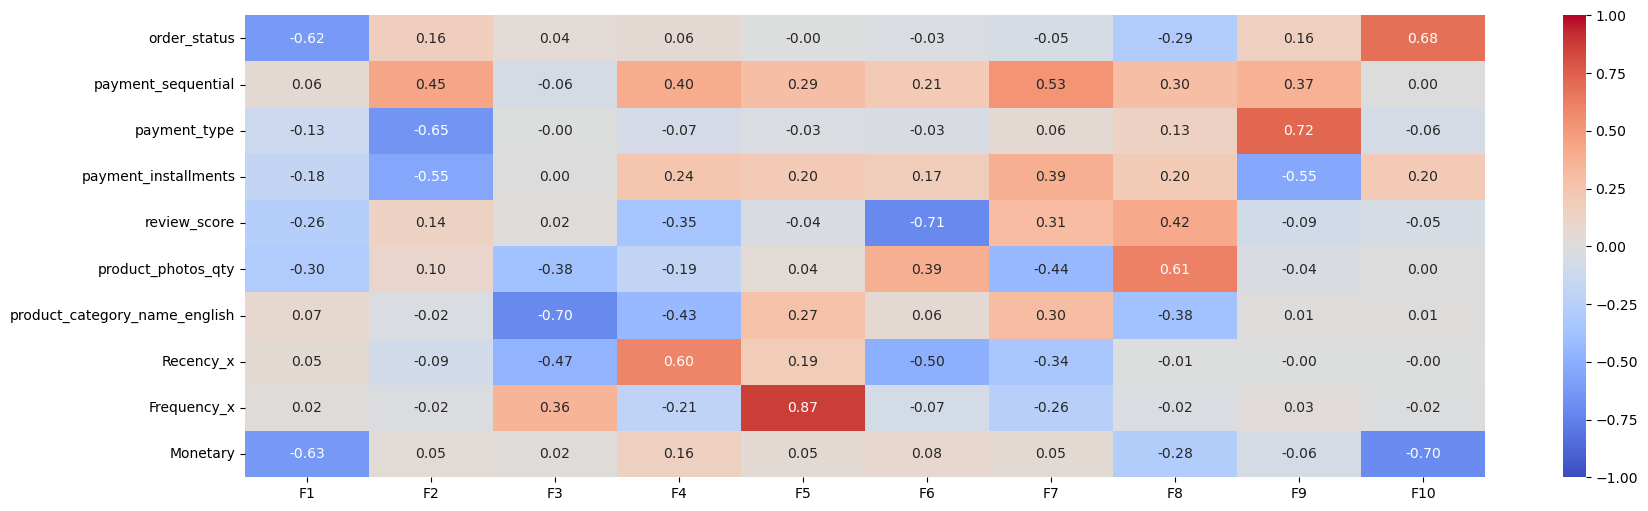

In [139]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")